In [1]:
%matplotlib inline

In [210]:
from datetime import datetime

from matplotlib import pyplot, rcParams
from matplotlib.text import Text
import pandas
import seaborn

In [275]:
seaborn.set(style='darkgrid', palette='Set3')
rcParams['savefig.dpi'] = 300
chosenPalette='Set2'

In [276]:
def dateParser(*args):
    return datetime.strptime('-'.join([str(arg) for arg in args]),'%y-%m-%d-%H-%M')

In [277]:
data = pandas.read_csv('coffee-tracker.csv', header=None,
                       parse_dates=[[0, 1, 2, 3, 4]],
                       date_parser=dateParser)

In [278]:
data.columns = ['Datetime', 'Drink', 'Location', 'City', 'State']

In [279]:
data['date'] = pandas.Series([xx.date() for xx in data.Datetime])
data['Local Time'] = pandas.Series([xx.hour + xx.minute / 60. for xx in data.Datetime])
data['Weekday'] = pandas.Series([xx.weekday_name for xx in data.Datetime])

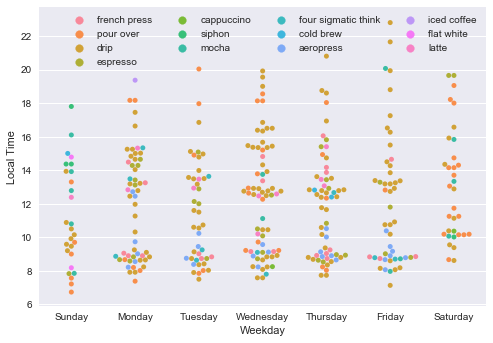

In [314]:
seaborn.swarmplot(data=data, x='Weekday', y='Local Time', hue='Drink',
                       order=['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday'])
pyplot.legend(ncol=4)
pyplot.savefig('drinkTypes.png')

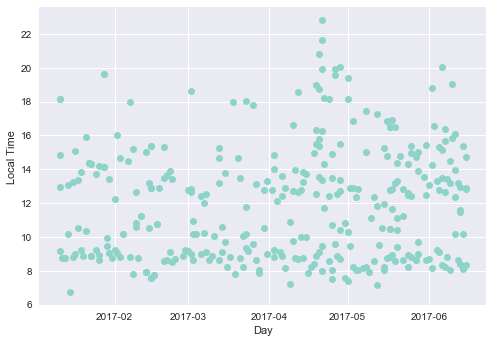

In [281]:
pyplot.plot(data['date'],data['Local Time'], 'o')
pyplot.xlabel('Day')
pyplot.ylabel('Local Time')
pyplot.savefig('drinkTimes.png')

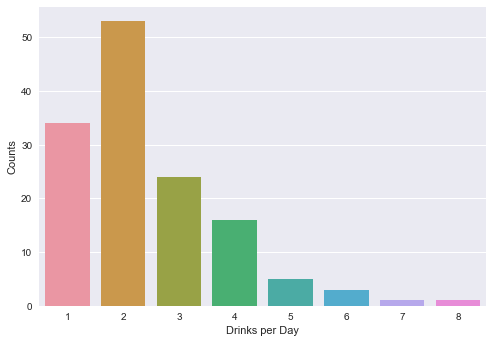

In [282]:
drinksPerDay = pandas.DataFrame({'Drinks Per Day': data.date.value_counts()})
seaborn.countplot(data=drinksPerDay, x='Drinks Per Day')
pyplot.xlabel('Drinks per Day')
pyplot.ylabel('Counts')
pyplot.savefig('drinkCounts.png')

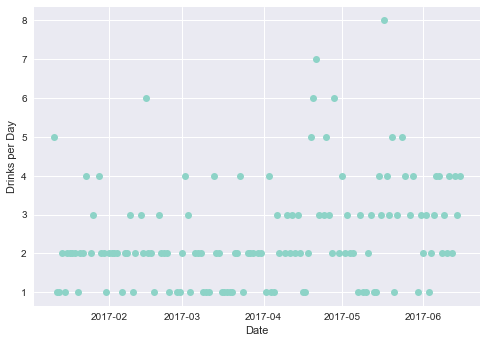

In [283]:
pyplot.plot(drinksPerDay.index, drinksPerDay.iloc[:, 0], 'o')
pyplot.xlabel('Date')
pyplot.ylabel('Drinks per Day')
pyplot.savefig('dailyDrinks.png')

In [219]:
drinksPerDay.head(10)

,Drinks Per Day
2017-05-17,8
2017-04-21,7
2017-04-28,6
2017-02-15,6
2017-04-20,6
2017-04-25,5
2017-05-20,5
2017-01-11,5
2017-05-24,5
2017-04-19,5


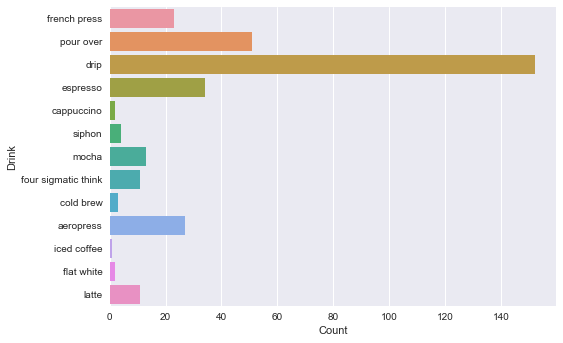

In [313]:
seaborn.countplot(data=data, y='Drink')
pyplot.xlabel('Count')
pyplot.savefig('numDrinkTypes.png', bbox_inches='tight')